In [11]:
# 读取spam.csv文件
import pandas as pd
df = pd.read_csv("data_spam/spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
# 重命名数据中的v1和v2列，使得拥有更好的可读性
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
# 把'ham'和'spam'标签重新命名为数字0和1
df['numLabel'] = df['Label'].map({'ham':0, 'spam':1})
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numLabel
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [14]:
# 统计有多少个ham，有多少个spam
print ("# of ham : ", len(df[df.numLabel == 0]), " # of spam: ", len(df[df.numLabel == 1]))
print ("# of total samples: ", len(df))

# of ham :  4825  # of spam:  747
# of total samples:  5572


the minimum length is:  2


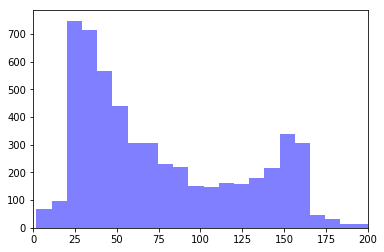

In [16]:
# 统计文本的长度信息
text_lengths = [len(df.loc[i,'Text']) for i in range(len(df))] 
print ("the minimum length is: ", min(text_lengths))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(text_lengths, 100, facecolor='blue', alpha=0.5)
plt.xlim([0,200])
plt.show()


In [18]:
# 导入英文呢的停用词库
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# what is stop wordS? he she the an a that this ...
stopset = set(stopwords.words("english"))

# 构建文本的向量 （基于词频的表示）
#vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

# sparse matrix 
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

  (0, 8267)	1
  (0, 1069)	1
  (0, 3594)	1
  (0, 7645)	1
  (0, 2048)	1
  (0, 1749)	1
  (0, 4476)	1
  (0, 8489)	1
  (0, 3634)	1
  (0, 1751)	1
  (0, 4087)	1
  (0, 5537)	1
  (0, 1303)	1
  (0, 2327)	1
  (0, 5920)	1
  (0, 4350)	1
  (0, 8030)	1
  (0, 3550)	1
  (1, 5533)	1
  (1, 8392)	1
  (1, 4318)	1
  (1, 4512)	1
  (1, 5504)	1
  (2, 77)	1
  (2, 1156)	1
  :	:
  (5570, 1786)	1
  (5570, 3470)	1
  (5570, 2892)	1
  (5570, 7049)	1
  (5570, 1778)	1
  (5570, 8065)	1
  (5570, 2592)	1
  (5570, 5334)	1
  (5570, 1438)	1
  (5570, 7627)	1
  (5570, 3308)	1
  (5570, 7039)	1
  (5570, 4615)	1
  (5570, 1084)	1
  (5570, 8313)	1
  (5570, 4218)	1
  (5570, 3781)	1
  (5570, 7756)	1
  (5570, 3358)	1
  (5570, 4087)	1
  (5571, 6505)	1
  (5571, 7885)	1
  (5571, 4225)	2
  (5571, 5244)	1
  (5571, 7756)	1


In [7]:
# 把数据分成训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print ("训练数据中的样本个数: ", X_train.shape[0], "测试数据中的样本个数: ", X_test.shape[0])

训练数据中的样本个数:  4457 测试数据中的样本个数:  1115


In [8]:
# 利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

# 打印混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])

accuracy on test data:  0.97847533632287


array([[956,  14],
       [ 10, 135]])